In [4]:
from databricks_langchain import ChatDatabricks
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END

@tool
def get_weather(location: str):
    """Get the weather for a specified location."""
    return f"The weather in {location} is sunny."

tools = [get_weather]
LLM_ENDPOINT_NAME = "databricks-claude-3-7-sonnet"
LLM = ChatDatabricks(endpoint=LLM_ENDPOINT_NAME)
model = LLM.bind_tools(tools)

def tool_calling_agent(state):
    messages = state["messages"]
    # The LLM will decide (in one step) whether to call a tool
    response = model.invoke(messages)
    return {"messages": [response]}

# In LangGraph, this could be a single-node graph:
workflow = StateGraph(MessagesState)
workflow.add_node("agent", tool_calling_agent)
workflow.add_edge(START, "agent")
workflow.add_edge("agent", END)
app = workflow.compile()

/var/folders/b3/rdsklr3d0s1f_fzq3pg5try40000gp/T/ipykernel_12854/209697698.py:12: DeprecationWarning: Currently, temperature defaults to 0.0 if not specified. In the next release, temperature will need to be explicitly set. Please update your code to specify a temperature value. Note: If you are using an o1 or o3 model, you need to set temperature=None.
  LLM = ChatDatabricks(endpoint=LLM_ENDPOINT_NAME)


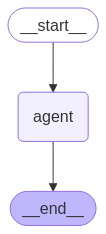

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))